<p id="part0"></p>

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #FF8C00;"> <a href="#part0" style="color:#FF8C00; text-decoration:none;">TABLE OF CONTENT</a></p>


<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part1" style="color:#808080; text-decoration:none;">Importing libraries</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part2" style="color:#808080; text-decoration:none;">Однофакторний дисперсійний аналіз (ONE-WAY ANOVA)</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part3" style="color:#808080; text-decoration:none;">Багатофакторний ANOVA</a></p>


<p id="part1"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Importing libraries</p>

<p style="text-align: right;"><a href="#part0" style="color:#FF8C00; text-decoration:none;">зміст</a></p>

In [153]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import matplotlib.pyplot as plt

<p id="part2"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Однофакторний дисперсійний аналіз (ONE-WAY ANALYSIS OF VARIANCE)</p>

<p style="text-align: right;"><a href="#part0" style="color:#FF8C00; text-decoration:none;">зміст</a></p>

Дуже часто в експериментах та дослідженнях виникає необхідність порівняти кілька груп між собою. У такому разі ми можемо застосовувати однофакторний дисперсійний аналіз. Та змінна, яка розділятиме наших випробуваних чи спостереження на групи (номінативна змінна з кількома градаціями) називається **незалежною змінною**. А та кількісна змінна, за рівнем вираженості якої ми порівнюємо групи, називається **залежна змінна**.

> Відобразимо незалежну та залежну перемінні у функції
це *залежність* змінної $у$ від перемінної $х$, якщо кожному значенню $X$ відповідає єдине значення $у$.

$x$: - **незалежна** змінна чи аргумент -  **номінативна** змінна з кількома градаціями

$y$ - **залежна** змінна чи значення функції  - це та **кількісна** змінна, за рівнем вираженості якої ми порівнюємо групи



>Приклад 1. Ми маємо 3 типи лікування, ми хочемо зрозуміти, чи є між ними різниця. Тут незалежна змінна – тип лікування (тип1, тип2, тип3). Залежна змінна - певна величина, у кожного випробуваного, яка покаже вам наскільки успішно було лікування (тривалість симптомів, середня температура протягом тижня після лікування, рівень речовини в крові і т.д.)

>Приклад 2. Хочемо з'ясувати, як різні добрива впливають на зростання помідорів, знову ж таки у нас є 3 добрива. Незалежна змінна – добрива. Залежна змінна – вага отриманих томатів (або висота рослини через Х днів).

>Загалом ми дивимося як щось НЕЗАЛЕЖНЕ, впливає на щось інше, тому щось інше (на яке ми впливаємо) називають ЗАЛЕЖНОЮ змінною. Показник, що цікавить нас, залежить від чогось, ми намагаємося з'ясувати природу цієї залежності.

In [78]:
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })

$$ data = \begin{bmatrix}3 & 5 & 7 \\1 & 3 & 6 \\2 & 4 & 5 \end{bmatrix}$$
<br>
$$ grand\_mean = \frac{3+ 1+ 2+ 5+ 3+ 4+ 7+ 6+ 5}{9}=\frac{36}{9}=4$$
<br>
$$ grand\_mean = \frac{3+ 1+ 2+ 5+ 3+ 4+ 7+ 6+ 5}{9}=\frac{sum(data.T.values.flatten())}{data.size}=4$$
$$ grand\_mean = data.values.flatten().mean()$$
#### total sum of squares (SST)
$$ SST = {(3-4)^2+ (1-4)^2+ (2-4)^2+ (5-4)^2+ (3-4)^2+ (4-4)^2+ (7-4)^2+ (6-4)^2+ (5-4)^2} = 30 $$
<br>
$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
#### SS(Between) is the sum of squares between the group means
#### SS(Between) — сума квадратів між середніми значеннями групи
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
#### Сума внутрішніх квадратів, SSW
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$

<br>
$$ SSW = (3-2)^2+(1-2)^2+(2-2)^2 + (5-4)^2+(3-4)^2+(4-4)^2 + (7-6)^2+(6-6)^2+(5-6)^2 = 6$$
<br>
$$ SSB = 3(2-4)^2 +  3(4-4)^2 + 3(6-4)^2 = 24$$
$$ SST = SSW + SSB = 6 + 24 = 30 $$
$$ SSB > SSW => Відмінності\ присутні $$
<br>
$$ Кількість\ ступенів\ свободи\ (degrees\ of\ freedom) $$
Якщо всього зібрано n точок даних, то є всього n−1 ступенів свободи (SST) <br>
dfSST = 9 - 1 = 8<br>
Якщо порівнюються m груп, то існує m-1 ступінь свободи, пов'язана з фактором, що цікавить. (SSB)<br>
dfSSB = 3 - 1 = 2<br>
Якщо всього зібрано n точок даних і порівнюються m груп, то є n-m ступенів свободи помилки. (SSW)<br>
dfSSW = 9 - 3 = 6<br>
<br>
$$F = \frac{\frac{SSB}{dfSSB}}{\frac{SSW}{dfSSW}} = \frac{\frac{24}{2}}{\frac{6}{6}} = 12$$

In [3]:
def one_way_anova(DataFrame):
    grand_mean = DataFrame.values.flatten().mean()
    SSB = sum(DataFrame[group].size * (group_mean - grand_mean)**2  for group, group_mean in DataFrame.mean().items())
    SSW = sum(sum((x - group_mean)**2 for x in DataFrame[group]) for group, group_mean in DataFrame.mean().items())
    groups = DataFrame.shape[1]
    dfSSB = groups - 1
    dfSSW = DataFrame.size - groups
    mSSB = SSB/dfSSB
    mSSW = SSW/dfSSW
    F = mSSB/mSSW
    p = stats.f.sf(F, dfSSB, dfSSW)
    return F, p

one_way_anova(data[['a','c']])

(24.0, 0.008049893100837719)

In [4]:
fvalue, pvalue = stats.f_oneway(*[data[i] for i in data[['a','c']]])
print(fvalue, pvalue)

24.0 0.008049893100837719


### Завдання
##### Перевірити чи є відмінності терапії A, B, C, D за допомогою дисперсійного аналізу
Генотерапія дозволяє коригувати роботу дефективного гена, відповідального за розвиток захворювання. В експерименті порівнювалася ефективність чотирьох різних типів терапії. Результати дослідження представлені у [таблиці](https://stepik.org/media/attachments/lesson/8083/genetherapy.csv)

In [11]:
URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
genetherapy = pd.read_csv(URL)
lm = ols('expr ~ Therapy', data=genetherapy).fit()
table = sm.stats.anova_lm(lm)

In [12]:
# https://habr.com/ru/post/556856/
def ssdev( xs ):
    '''Сума квадратів відхилень між
        кожним елементом та середнім за вибіркою'''
    mu = xs.mean() 
    square_deviation = lambda x : (x - mu) ** 2 
    return sum( map(square_deviation, xs) )

# ssw - внутрішньогрупова сума квадратів відхилень 
# sst - повна сума квадратів по всьому набору
# ssb = sst - ssw міжгрупова сума квадратів відхилень

SSW = sum(genetherapy.groupby('Therapy').apply(lambda g: ssdev(np.array(g)))) # Out: 1302.2666666666669
SST = ssdev(genetherapy.expr) # Out: 1862.9833333333331
SSB = SST - SSW # Out: 560.7166666666662

# dfSSB - міжгрупові ступені свободи: m-1
# dfSSW - внутрішньогрупові ступені свободи: n-m
# MSw  внутрішньогрупова дисперсія
# MSb  міжгрупова дисперсія
# F  критерій Фішера

dfSSB = len(genetherapy.Therapy.unique())-1 # Out: 3
dfSSW = len(genetherapy.expr) - len(genetherapy.Therapy.unique()) # Out: 56
MSw = SSW/dfSSW # Out: 186.90555556
MSb = SSB/dfSSB # Out: 23.2547619
F = MSb/MSw # Out: 8.03730248
p_value = 1-stats.f.cdf(F, dfn=dfSSB, dfd=dfSSW) # Out: 0.0001525
table

,df,sum_sq,mean_sq,F,PR(>F)
Therapy,3.0,560.716667,186.905556,8.037302,0.000152
Residual,56.0,1302.266667,23.254762,NaN,NaN


p_value < 0.05 тобто нульову гіпотезу A=B=C=D відхиляємо і можемо сказати що між різних типів терапії є різниця, а щоб дізнатись саме для яких, потрібно провести множинні порівняння (Multiple Comparisons)

<p id="part3"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Багатофакторний ANOVA (Multivariate ANOVA)</p>

<p style="text-align: right;"><a href="#part0" style="color:#FF8C00; text-decoration:none;">зміст</a></p>

<p style="color:#d910e0; text-align: center;">Двофакторний дисперсійний аналіз</p>
<p style="color:#d910e0; text-align: center;">Two-way ANOVA</p>

#### Завдання
Атеросклероз досить небезпечне захворювання – причина ішемічної хвороби серця та інсультів. Аналіз експресії генів лейкоцитів дозволяє передбачити можливість розвитку цього захворювання. В експерименті досліджувався (ЗАЛЕЖНА ЗМІННА) **рівень експресії** залежно від **віку** пацієнтів та **дозування** (НЕЗАЛЕЖНІ ЗМІННІ) ліків аторвастатину.

In [161]:
URL = 'https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv'
atherosclerosis = pd.read_csv(URL)
lm = ols('expr ~ age + dose', data=atherosclerosis).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
dose,1.0,16.912241,16.912241,0.648351,0.423830
age,1.0,197.452754,197.452754,7.569592,0.007804
Residual,61.0,1591.184501,26.084992,NaN,NaN


In [156]:
atherosclerosis['age'] = atherosclerosis.age.mask(atherosclerosis.age==2, 'old').mask(atherosclerosis.age==1, 'yang')
atherosclerosis['group'] = atherosclerosis.age+atherosclerosis.dose

In [157]:
MultiComp = MultiComparison(atherosclerosis.expr, atherosclerosis['group'])
MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
oldD1,oldD2,1.2688,0.8978,-3.541,6.0787,False
oldD1,yangD1,3.7537,0.1774,-1.0562,8.5635,False
oldD1,yangD2,4.5411,0.071,-0.2688,9.3509,False
oldD2,yangD1,2.4848,0.5259,-2.325,7.2947,False
oldD2,yangD2,3.2722,0.2845,-1.5376,8.0821,False
yangD1,yangD2,0.7874,0.9726,-4.0225,5.5973,False


In [163]:
MultiComp1 = MultiComparison(atherosclerosis.expr, atherosclerosis['age'])
MultiComp1.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-3.5129,0.0076,-6.0581,-0.9678,True


In [164]:
MultiComp2 = MultiComparison(atherosclerosis.expr, atherosclerosis['dose'])
MultiComp2.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D1,D2,1.0281,0.4468,-1.6561,3.7123,False


Text(0.5, 1.0, '95% family-wise confidence level')

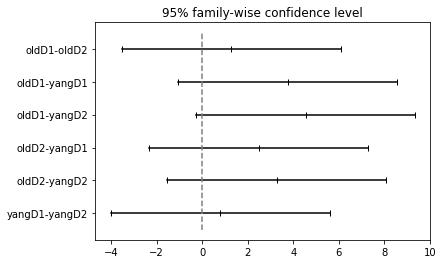

In [158]:
data = MultiComp.tukeyhsd()._results_table.data
df = pd.DataFrame(data[1:], columns=data[0])

df['category'] = df['group1'] + ['-'] * len(df) + df['group2']
df['orderby'] = range(len(df), 0, -1)

for lower, upper, meandiff, y in zip(df['lower'], df['upper'], df['meandiff'], df['orderby']):
    plt.plot((lower, upper),(y, y), '|-', color='black')
    plt.plot(meandiff, y ,'|-', color='black')
    
plt.yticks(df['orderby'], df['category'])
plt.vlines(0, df['orderby'].min() - 0.5, df['orderby'].max() + 0.5, linestyles='dashed', color='gray')
plt.title('95% family-wise confidence level')

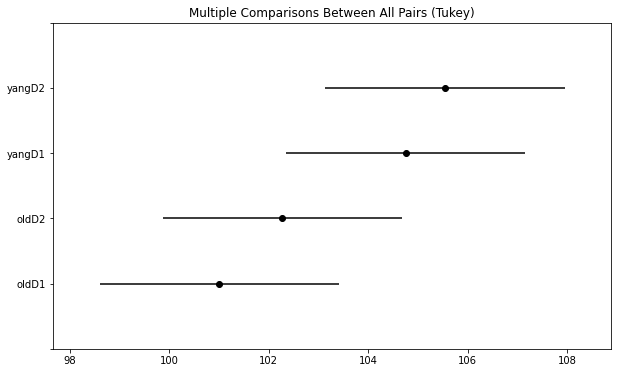

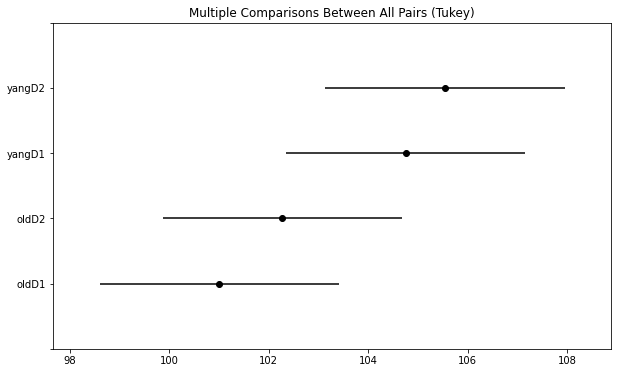

In [165]:
MultiComp.tukeyhsd().plot_simultaneous()

Тест Левена це логічна статистика, що використовується для оцінки рівності дисперсій для змінної, розрахованої для двох або більше груп. Деякі поширені статистичні процедури припускають, що дисперсії популяцій, у тому числі взяті різні вибірки, рівні. Тест Левена оцінює це припущення. Він перевіряє нульову гіпотезу у тому, що дисперсії популяції рівні. Якщо результуюче p-значення тесту Левена менше деякого рівня значущості (зазвичай 0.05), отримані відмінності у вибіркових дисперсіях навряд чи мали місце на основі випадкової вибірки з популяції з рівними дисперсіями. Таким чином, нульова гіпотеза рівних дисперсій відкидається і робиться висновок про наявність різниці між дисперсіями у популяції.

In [159]:
def test_leven(*data1):
    test_leven, p = stats.levene(*data1)
    print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
    alpha = 0.05
    if p < alpha:
        print('Відхилити гіпотезу про рівність дисперсій')
    else:
        print('Прийняти гіпотезу про рівність дисперсій')

In [162]:
test_leven(atherosclerosis.query('age == 1').expr, 
           atherosclerosis.query('age == 2').expr, 
           atherosclerosis.query('dose == "D1"').expr,
           atherosclerosis.query('dose == "D1"').expr)

Statistics=0.236, p-value=0.871
Прийняти гіпотезу про рівність дисперсій
